In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

file_path = 'dataset_allmerged_0801.csv'
data = pd.read_csv(file_path)

data.head()

,date,mean_ndvi_BD,mean_ndvi_FN,mean_ndvi_FS,mean_ndvi_SF,mean_evi_BD,mean_evi_FN,mean_evi_FS,mean_evi_SF,Unnamed: 0,...,total_evaporation_min,total_evaporation_max,u_component_of_wind_10m_min,u_component_of_wind_10m_max,v_component_of_wind_10m_min,v_component_of_wind_10m_max,surface_pressure_min,surface_pressure_max,total_precipitation_min,total_precipitation_max
0,2000-02-18,0.150780,0.170423,0.210635,0.153777,1083.690481,1173.116807,1320.615446,1064.290082,0.0,...,-0.000011,-5.177265e-07,-6.103893,-1.944337,-3.189174,-1.159077,100362.308545,100801.794380,-1.192086e-08,8.672476e-07
1,2000-03-05,0.167119,0.165437,0.192939,0.163899,1190.495076,1160.039534,1244.863461,1131.118163,1.0,...,-0.000013,-4.704064e-07,-2.810616,1.238276,-4.873330,-2.035807,100118.871403,100615.379876,-1.192092e-08,4.351138e-07
2,2000-03-21,0.167519,0.165111,0.189488,0.169773,1199.363671,1175.422571,1248.274042,1165.108502,2.0,...,-0.000010,-2.474338e-07,-1.179830,3.169232,-3.586134,-0.175435,99894.112508,100352.731866,-1.490116e-08,8.672476e-07
3,2000-04-06,0.161087,0.158019,0.183388,0.159660,1170.915011,1146.623694,1240.030405,1132.680975,3.0,...,-0.000027,-5.461225e-07,-2.815630,1.204424,-3.957681,0.024509,99882.060025,100393.139511,0.000000e+00,1.464198e-04
4,2000-04-22,0.159111,0.152596,0.174937,0.165656,1164.541254,1128.631710,1211.656629,1177.454284,4.0,...,-0.000007,-6.237735e-07,-6.620314,-1.879572,-3.592079,-0.084968,100022.410830,100474.666230,-5.205891e-09,8.523463e-07


In [2]:
ndvi_summary = data[['mean_ndvi_SF', 'mean_ndvi_BD', 'mean_ndvi_FN', 'mean_ndvi_FS']].describe()

ndvi_summary

,mean_ndvi_SF,mean_ndvi_BD,mean_ndvi_FN,mean_ndvi_FS
count,529.000000,529.000000,529.000000,529.000000
mean,0.224726,0.228706,0.231325,0.316588
std,0.088499,0.084285,0.082524,0.142920
min,0.135580,0.135966,0.125897,0.152801
25%,0.171561,0.170490,0.171856,0.208788
50%,0.189423,0.196615,0.202726,0.260944
75%,0.230624,0.250405,0.262054,0.388016
max,0.596296,0.546449,0.555152,0.697302


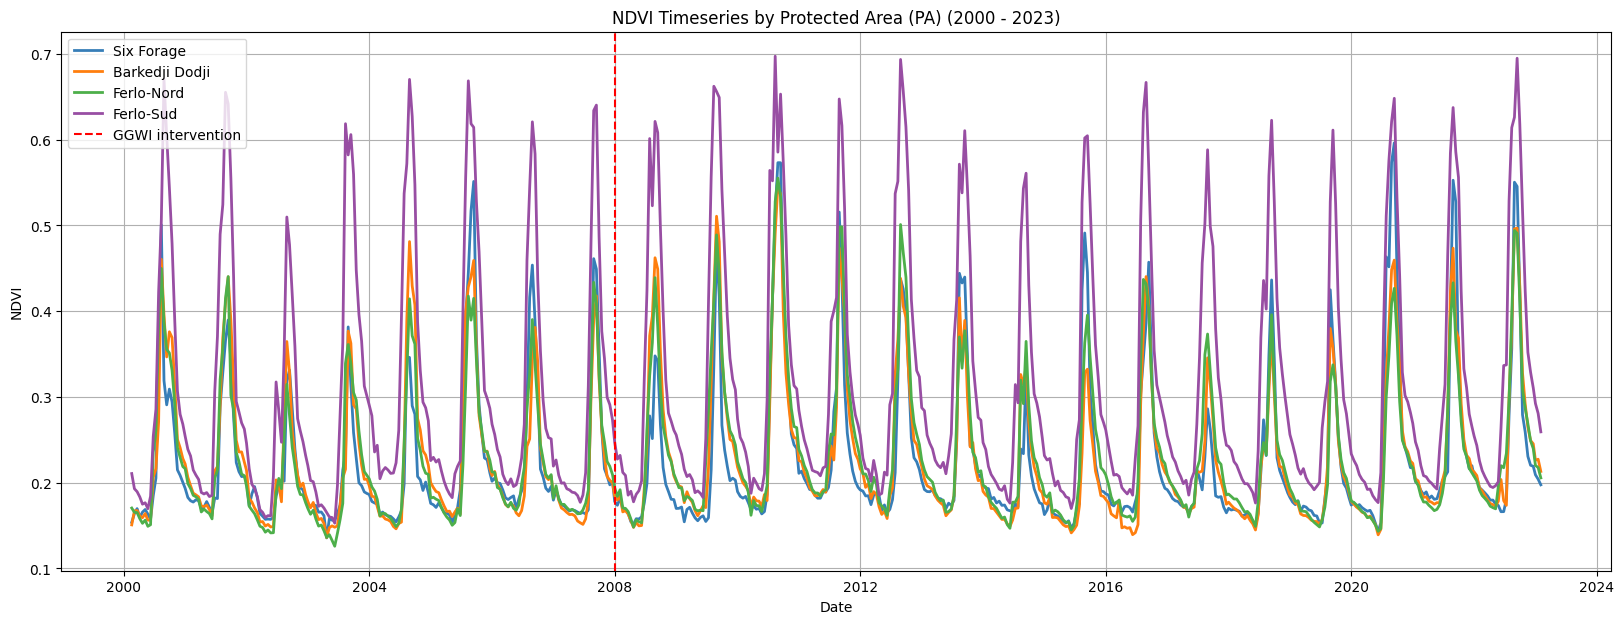

In [3]:
data['date'] = pd.to_datetime(data['date'])

colorblind_colors = {
    'Six Forage': '#377eb8',  # blue
    'Barkedji Dodji': '#ff7f0e',  # orange
    'Ferlo-Nord': '#4daf4a',  # green
    'Ferlo-Sud': '#984ea3'  # purple
}

# Plot - NDVI with colorblind colors
plt.figure(figsize=(20, 7))
plt.plot(data['date'], data['mean_ndvi_SF'], label='Six Forage', color=colorblind_colors['Six Forage'], linewidth=2)
plt.plot(data['date'], data['mean_ndvi_BD'], label='Barkedji Dodji', color=colorblind_colors['Barkedji Dodji'], linewidth=2)
plt.plot(data['date'], data['mean_ndvi_FN'], label='Ferlo-Nord', color=colorblind_colors['Ferlo-Nord'], linewidth=2)
plt.plot(data['date'], data['mean_ndvi_FS'], label='Ferlo-Sud', color=colorblind_colors['Ferlo-Sud'], linewidth=2)
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.axvline(x=pd.to_datetime('2008-01-01'), color='red', linestyle='--', label='GGWI intervention')
plt.title('NDVI Timeseries by Protected Area (PA) (2000 - 2023)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Split the data into two periods: 2000-2007 and 2008-2023
data_pre_2008 = data[data['date'] < '2008-01-01']
data_post_2008 = data[data['date'] >= '2008-01-01']

# Calculate summary statistics for NDVI by region
ndvi_summary_pre_2008 = data_pre_2008[['mean_ndvi_SF', 'mean_ndvi_BD', 'mean_ndvi_FN', 'mean_ndvi_FS']].describe()
ndvi_summary_post_2008 = data_post_2008[['mean_ndvi_SF', 'mean_ndvi_BD', 'mean_ndvi_FN', 'mean_ndvi_FS']].describe()

# Combine and show 
ndvi_summary_comparison = pd.concat([ndvi_summary_pre_2008, ndvi_summary_post_2008], keys=['2000-2007', '2008-2023'])
ndvi_summary_comparison

mean_ndvi_SF  mean_ndvi_BD  mean_ndvi_FN  mean_ndvi_FS
2000-2007 count    181.000000    181.000000    181.000000    181.000000
          mean       0.219956      0.225467      0.221580      0.309285
          std        0.080267      0.081981      0.076736      0.144376
          min        0.135580      0.135966      0.125897      0.152801
          25%        0.169521      0.166452      0.166319      0.201526
          50%        0.189200      0.196615      0.194331      0.253897
          75%        0.226625      0.249549      0.247437      0.387018
          max        0.551281      0.481142      0.449790      0.670269
2008-2023 count    348.000000    348.000000    348.000000    348.000000
          mean       0.227207      0.230391      0.236393      0.320386
          std        0.092505      0.085526      0.085046      0.142218
          min        0.143004      0.139158      0.143320      0.169892
          25%        0.172490      0.172443      0.176697      0.210290
          50%        0.189479      0.197677      0.205318      0.263792
          75%        0.232498      0.250408      0.268803      0.395515
          max        0.596296      0.546449      0.555152      0.697302

In [5]:
# Function to calculate the trend (slope) using linear regression
def calculate_trend(data, ndvi_col):
    data = data.dropna(subset=[ndvi_col])
    X = np.array((data['date'] - data['date'].min()).dt.days).reshape(-1, 1)
    y = data[ndvi_col].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

In [6]:
# Filter data into two periods: 2000-2008 and 2008-2023
data_2000_2007 = data[(data['date'] >= '2000-01-01') & (data['date'] <= '2007-12-31')]
data_2008_2023 = data[(data['date'] >= '2008-01-01') & (data['date'] <= '2023-07-31')]

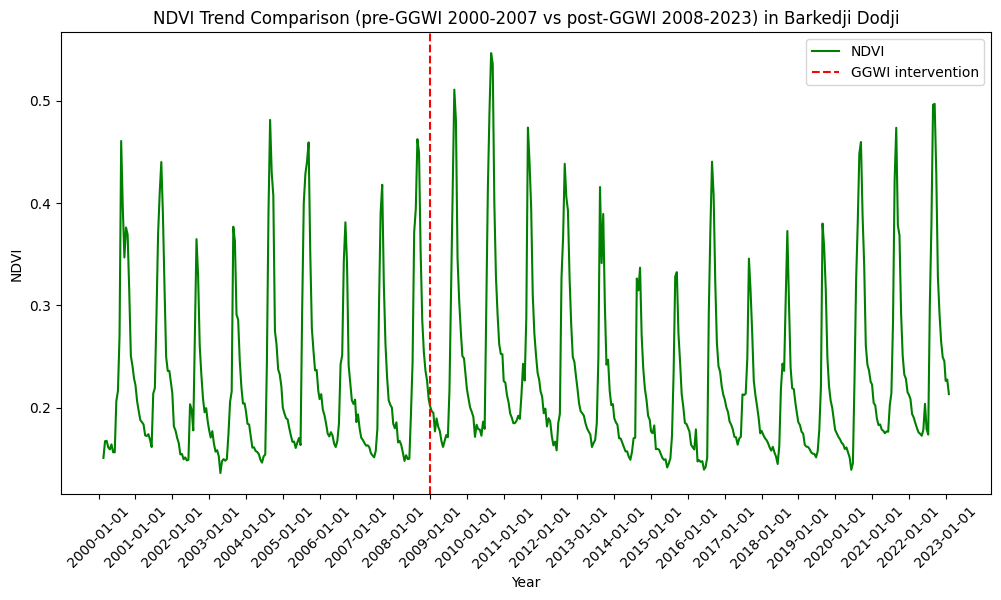

(-5.358095050796135e-07, -2.4550405268649333e-06)

In [7]:
"""
NDVI plot with linegraph - Bakerdji Dodji
"""

ndvi_col = 'mean_ndvi_BD'

# Plot the trends for visualization
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[ndvi_col], label='NDVI', color='green')
plt.axvline(x=pd.to_datetime('2009-01-01'), color='red', linestyle='--', label='GGWI intervention')
plt.xticks(pd.date_range(start='2000', end='2023', freq='YS'), rotation=45)
plt.title('NDVI Trend Comparison (pre-GGWI 2000-2007 vs post-GGWI 2008-2023) in Barkedji Dodji')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()


"""
Trend
"""

# Calculate trends
trend_2000_2007 = calculate_trend(data_2000_2007, ndvi_col)
trend_2008_2023 = calculate_trend(data_2008_2023, ndvi_col)

# Display the calculated trends
trend_2000_2007, trend_2008_2023

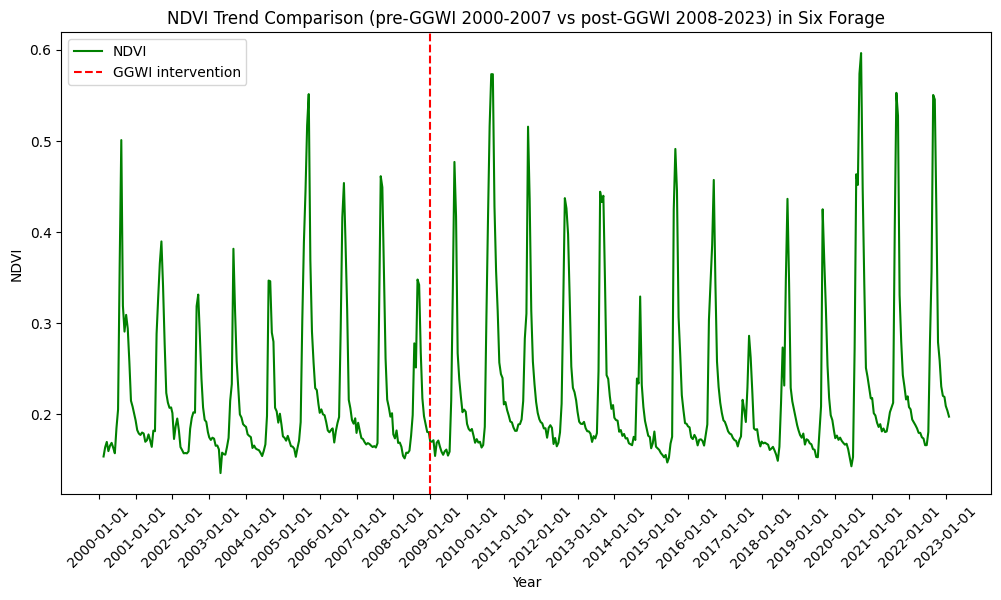

(9.189341696726162e-06, 3.5706028660467657e-06)

In [8]:
"""
NDVI plot with linegraph - Six Forage
"""

ndvi_col = 'mean_ndvi_SF'

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[ndvi_col], label='NDVI', color='green')
plt.axvline(x=pd.to_datetime('2009-01-01'), color='red', linestyle='--', label='GGWI intervention')
plt.xticks(pd.date_range(start='2000', end='2023', freq='YS'), rotation=45)
plt.title('NDVI Trend Comparison (pre-GGWI 2000-2007 vs post-GGWI 2008-2023) in Six Forage')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()


"""
Trend
"""

trend_2000_2007 = calculate_trend(data_2000_2007, ndvi_col)
trend_2008_2023 = calculate_trend(data_2008_2023, ndvi_col)
trend_2000_2007, trend_2008_2023

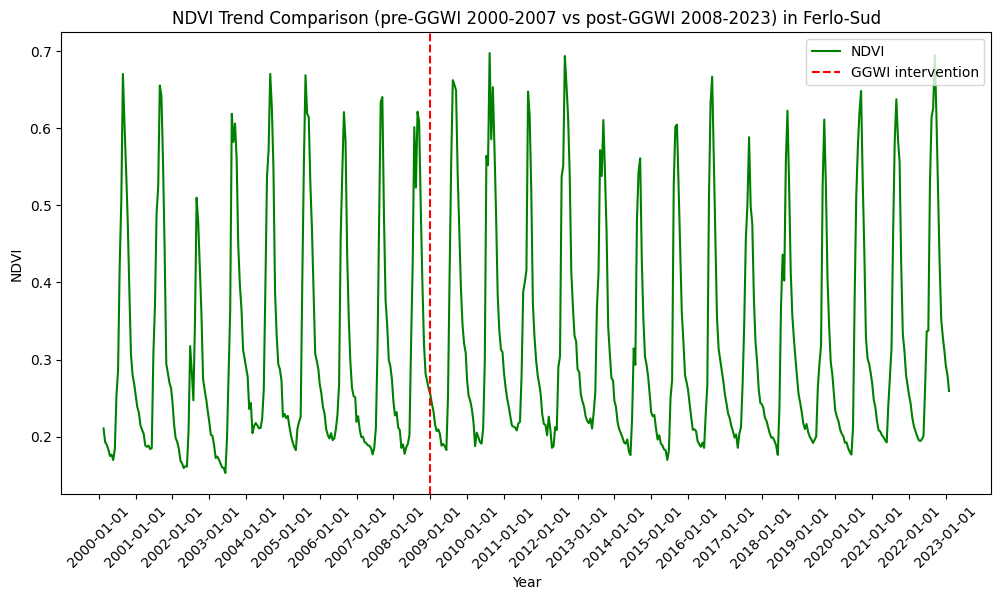

(9.273442506048215e-06, -4.692232151471956e-07)

In [9]:
"""
NDVI plot with linegraph = Ferlo-Sud
"""

ndvi_col = 'mean_ndvi_FS'

# Plot the trends for visualization
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[ndvi_col], label='NDVI', color='green')
plt.axvline(x=pd.to_datetime('2009-01-01'), color='red', linestyle='--', label='GGWI intervention')
plt.xticks(pd.date_range(start='2000', end='2023', freq='YS'), rotation=45)
plt.title('NDVI Trend Comparison (pre-GGWI 2000-2007 vs post-GGWI 2008-2023) in Ferlo-Sud')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()


"""
Trend
"""

trend_2000_2007 = calculate_trend(data_2000_2007, ndvi_col)
trend_2008_2023 = calculate_trend(data_2008_2023, ndvi_col)

trend_2000_2007, trend_2008_2023

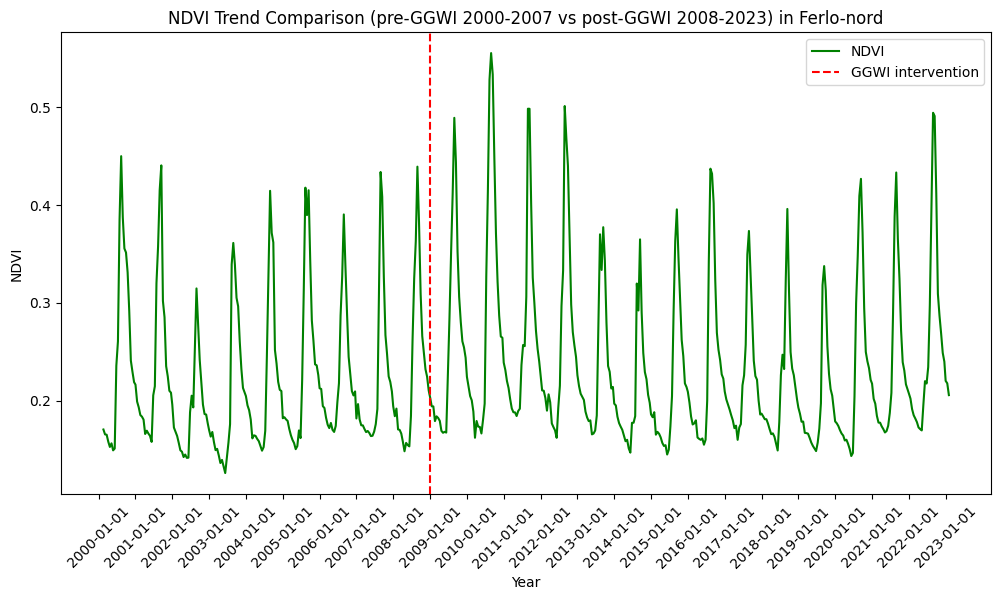

(3.1854803929552904e-06, -4.278892464403288e-06)

In [10]:
"""
NDVI plot with linegraph - Ferlo-nord
"""

ndvi_col = 'mean_ndvi_FN'

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[ndvi_col], label='NDVI', color='green')
plt.axvline(x=pd.to_datetime('2009-01-01'), color='red', linestyle='--', label='GGWI intervention')
plt.xticks(pd.date_range(start='2000', end='2023', freq='YS'), rotation=45)
plt.title('NDVI Trend Comparison (pre-GGWI 2000-2007 vs post-GGWI 2008-2023) in Ferlo-nord')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()


"""
Trend
"""

trend_2000_2007 = calculate_trend(data_2000_2007, ndvi_col)
trend_2008_2023 = calculate_trend(data_2008_2023, ndvi_col)

# Plot
trend_2000_2007, trend_2008_2023

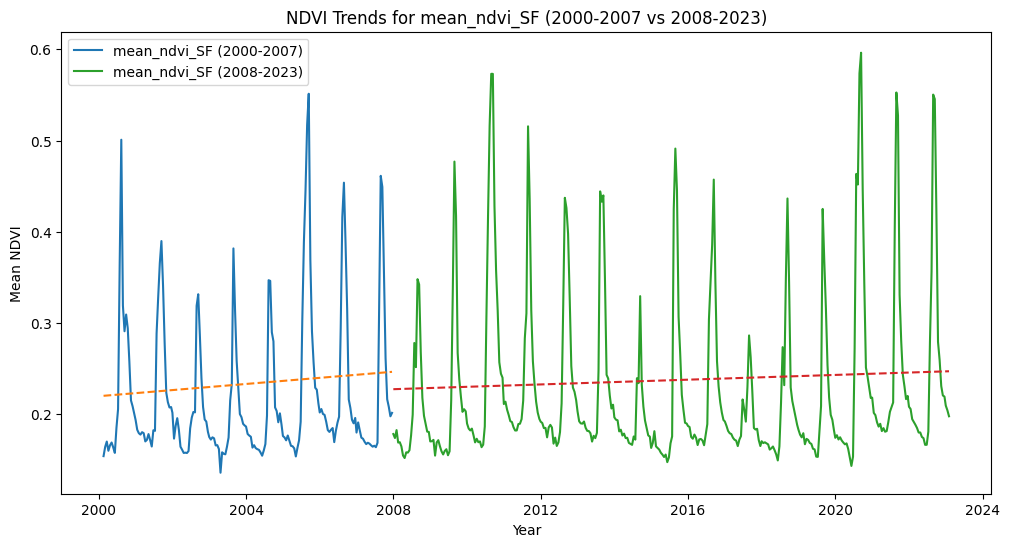

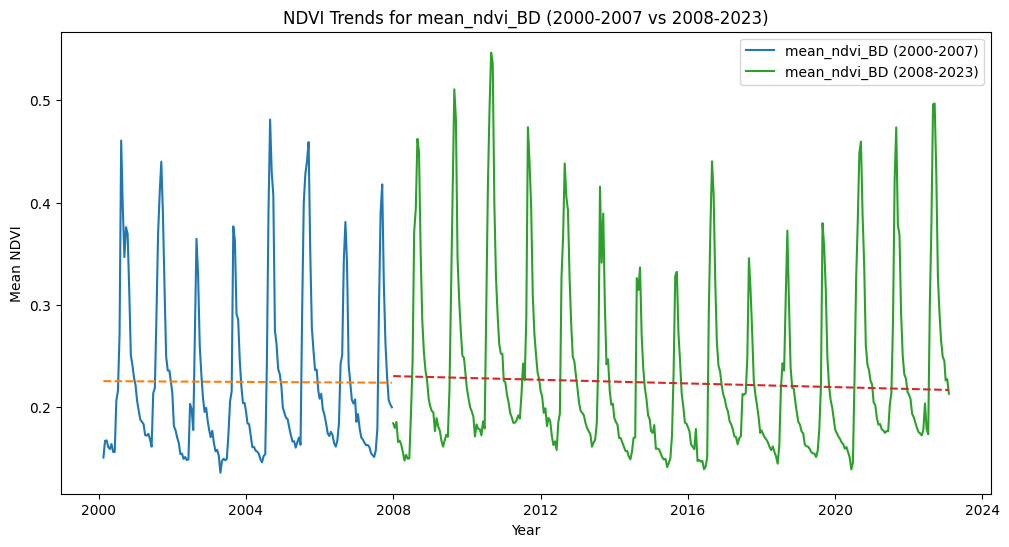

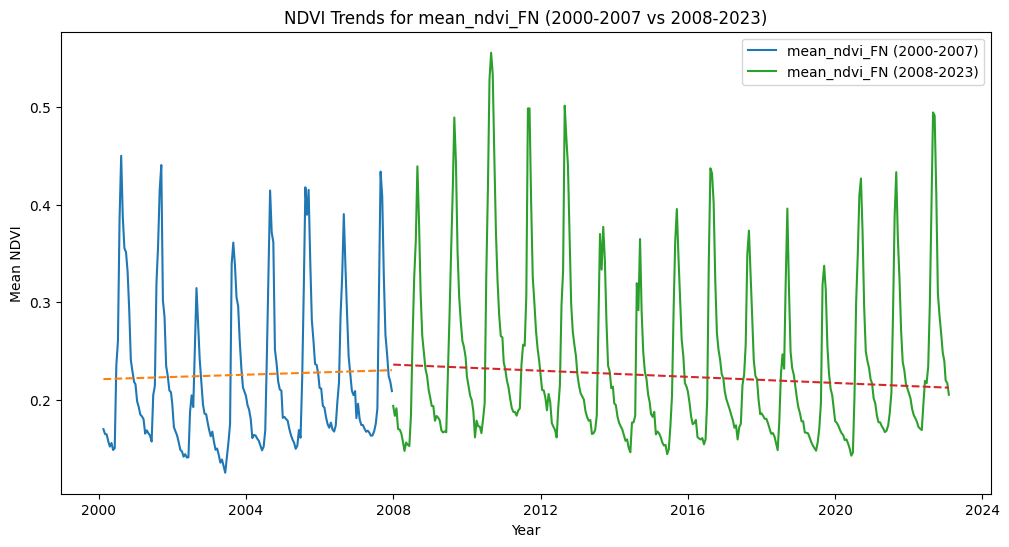

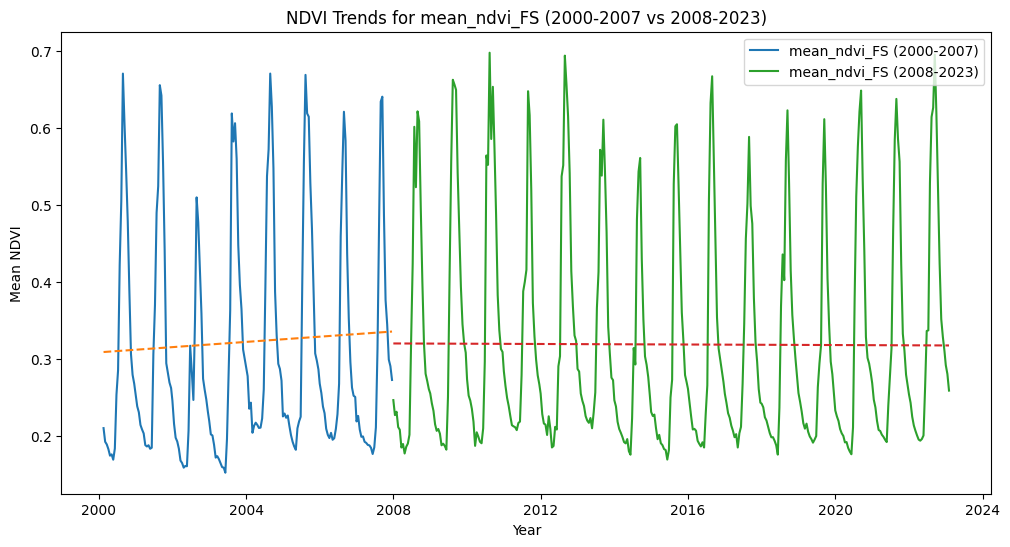

In [11]:
ndvi_columns = ['mean_ndvi_SF', 'mean_ndvi_BD', 'mean_ndvi_FN', 'mean_ndvi_FS']


def plot_ndvi_trends_region(region, data_2000_2007, data_2008_2023):
    plt.figure(figsize=(12, 6))

    plt.plot(data_2000_2007['date'], data_2000_2007[region], label=f'{region} (2000-2007)')
    
    trend_2000_2007 = calculate_trend(data_2000_2007, region)
    X_2000_2007 = np.array((data_2000_2007['date'] - data_2000_2007['date'].min()).dt.days).reshape(-1, 1)
    plt.plot(data_2000_2007['date'], trend_2000_2007 * X_2000_2007.flatten() + data_2000_2007[region].mean(), linestyle='--')

    plt.plot(data_2008_2023['date'], data_2008_2023[region], label=f'{region} (2008-2023)')
    
    trend_2008_2023 = calculate_trend(data_2008_2023, region)
    X_2008_2023 = np.array((data_2008_2023['date'] - data_2008_2023['date'].min()).dt.days).reshape(-1, 1)
    plt.plot(data_2008_2023['date'], trend_2008_2023 * X_2008_2023.flatten() + data_2008_2023[region].mean(), linestyle='--')

    plt.title(f'NDVI Trends for {region} (2000-2007 vs 2008-2023)')
    plt.xlabel('Year')
    plt.ylabel('Mean NDVI')
    plt.legend()
    plt.show()

# Plot 
for col in ndvi_columns:
    plot_ndvi_trends_region(col, data_2000_2007, data_2008_2023)

In [12]:
# Calculate the trend for each region and period
trends = {}

for col in ndvi_columns:
    trend_2000_2007 = calculate_trend(data_2000_2007, col)
    trend_2008_2023 = calculate_trend(data_2008_2023, col)
    trends[col] = {
        '2000-2007': trend_2000_2007,
        '2008-2023': trend_2008_2023
    }

trends_df = pd.DataFrame(trends).T
trends_df.columns = ['2000-2007 Trend', '2008-2023 Trend']

trends_df

,2000-2007 Trend,2008-2023 Trend
mean_ndvi_SF,9.189342e-06,3.570603e-06
mean_ndvi_BD,-5.358095e-07,-2.455041e-06
mean_ndvi_FN,3.185480e-06,-4.278892e-06
mean_ndvi_FS,9.273443e-06,-4.692232e-07


In [13]:
# Three periods: 2000-2007, 2008-2015, and 2016-2023
data_2000_2007 = data[(data['date'] >= '2000-01-01') & (data['date'] <= '2007-12-31')]
data_2008_2015 = data[(data['date'] >= '2008-01-01') & (data['date'] <= '2015-12-31')]
data_2016_2023 = data[(data['date'] >= '2016-01-01') & (data['date'] <= '2023-07-31')]

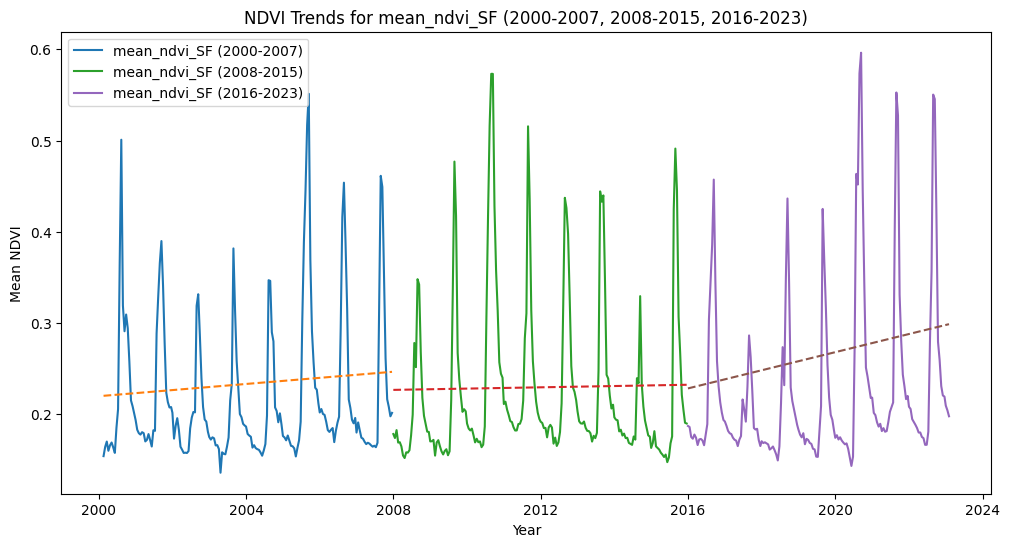

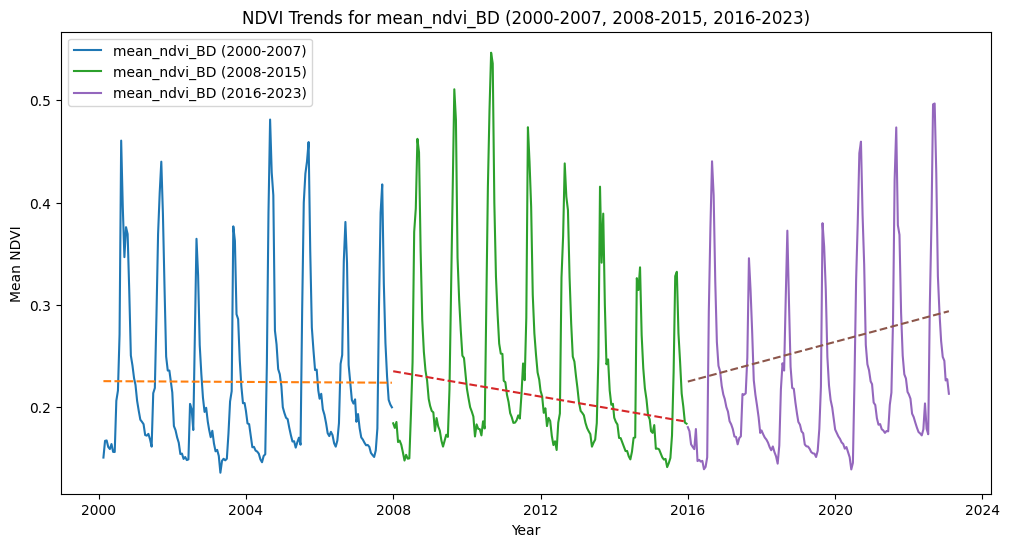

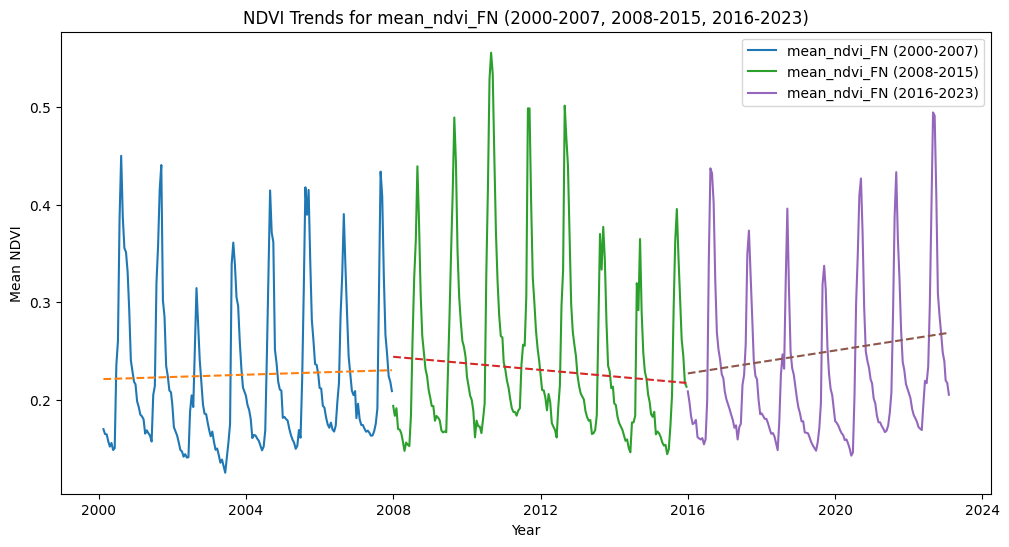

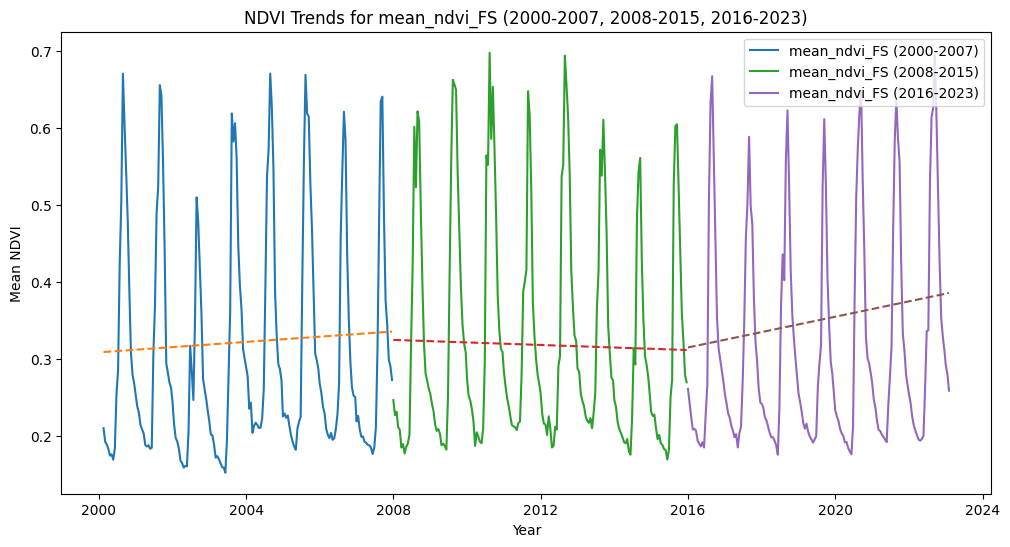

In [14]:
def plot_ndvi_trends_region_three(region, data_2000_2007, data_2008_2015, data_2016_2023):
    plt.figure(figsize=(12, 6))

    plt.plot(data_2000_2007['date'], data_2000_2007[region], label=f'{region} (2000-2007)')
    
    trend_2000_2007 = calculate_trend(data_2000_2007, region)
    X_2000_2007 = np.array((data_2000_2007['date'] - data_2000_2007['date'].min()).dt.days).reshape(-1, 1)
    plt.plot(data_2000_2007['date'], trend_2000_2007 * X_2000_2007.flatten() + data_2000_2007[region].mean(), linestyle='--')

    plt.plot(data_2008_2015['date'], data_2008_2015[region], label=f'{region} (2008-2015)')
    
    trend_2008_2015 = calculate_trend(data_2008_2015, region)
    X_2008_2015 = np.array((data_2008_2015['date'] - data_2008_2015['date'].min()).dt.days).reshape(-1, 1)
    plt.plot(data_2008_2015['date'], trend_2008_2015 * X_2008_2015.flatten() + data_2008_2015[region].mean(), linestyle='--')

    plt.plot(data_2016_2023['date'], data_2016_2023[region], label=f'{region} (2016-2023)')
    
    trend_2016_2023 = calculate_trend(data_2016_2023, region)
    X_2016_2023 = np.array((data_2016_2023['date'] - data_2016_2023['date'].min()).dt.days).reshape(-1, 1)
    plt.plot(data_2016_2023['date'], trend_2016_2023 * X_2016_2023.flatten() + data_2016_2023[region].mean(), linestyle='--')

    plt.title(f'NDVI Trends for {region} (2000-2007, 2008-2015, 2016-2023)')
    plt.xlabel('Year')
    plt.ylabel('Mean NDVI')
    plt.legend()
    plt.show()

# Plot 
for col in ndvi_columns:
    plot_ndvi_trends_region_three(col, data_2000_2007, data_2008_2015, data_2016_2023)

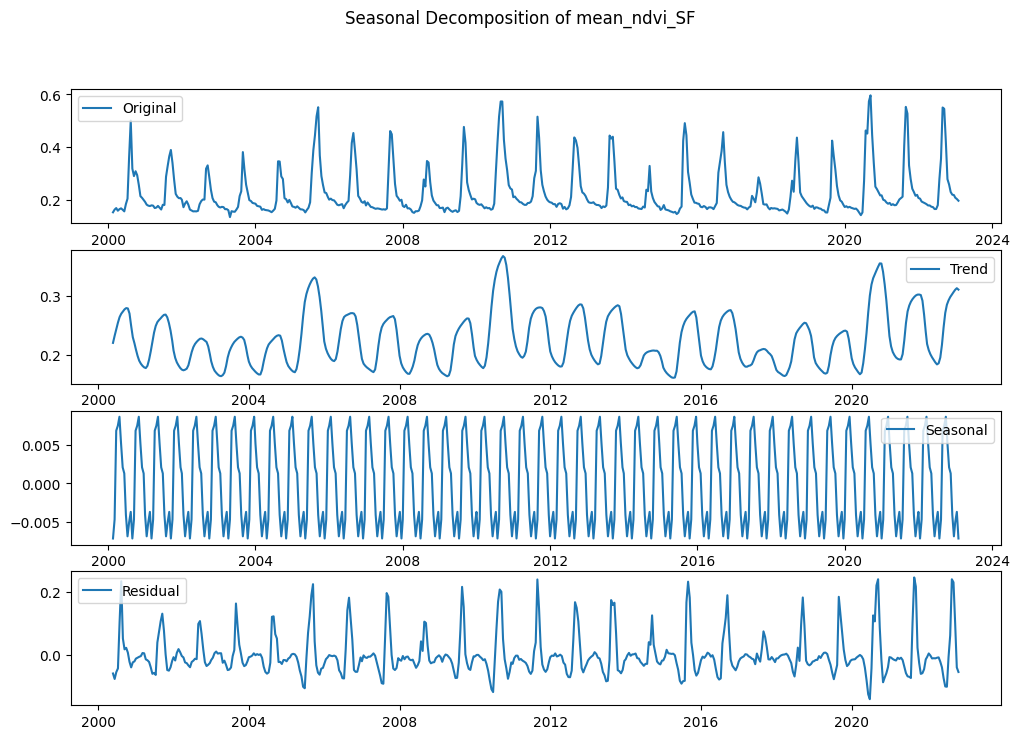

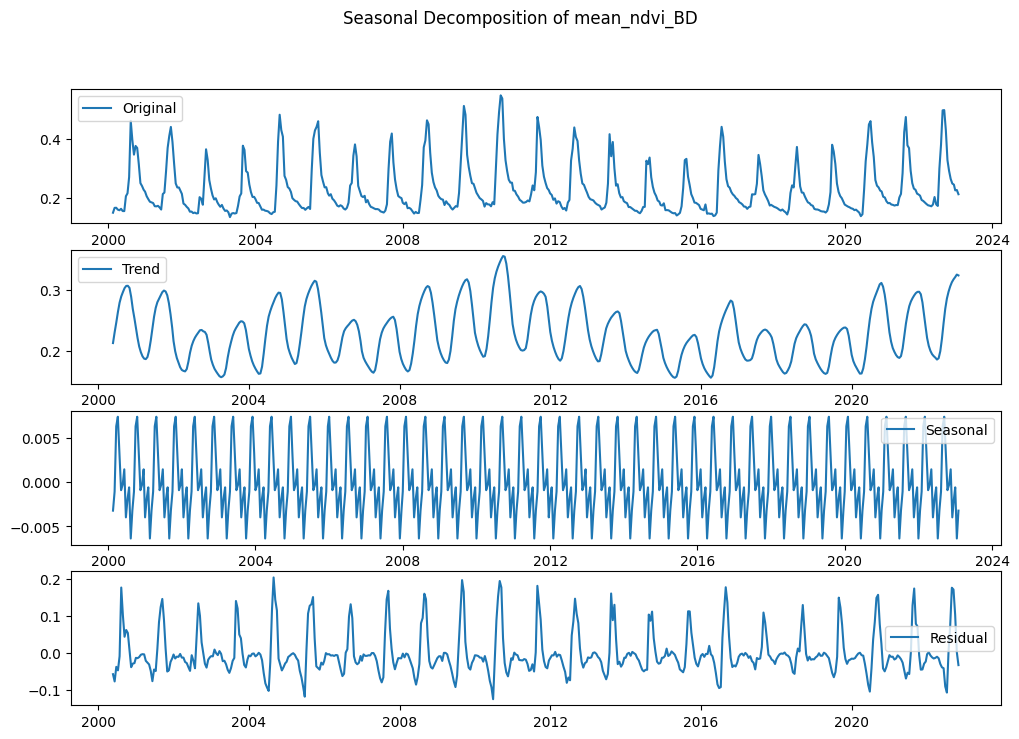

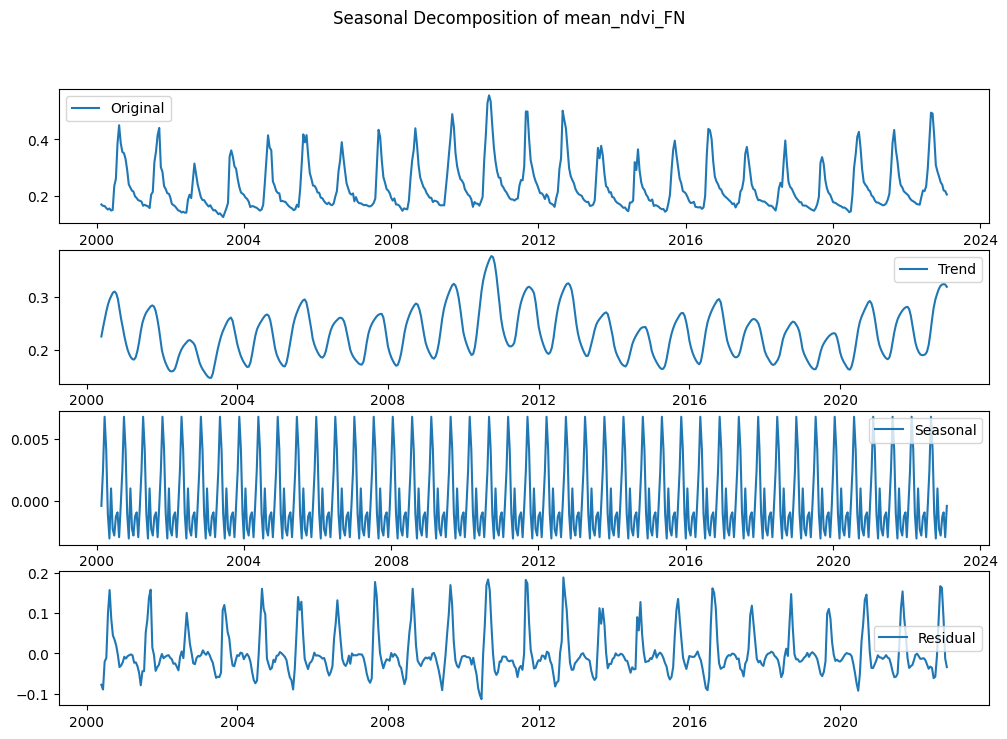

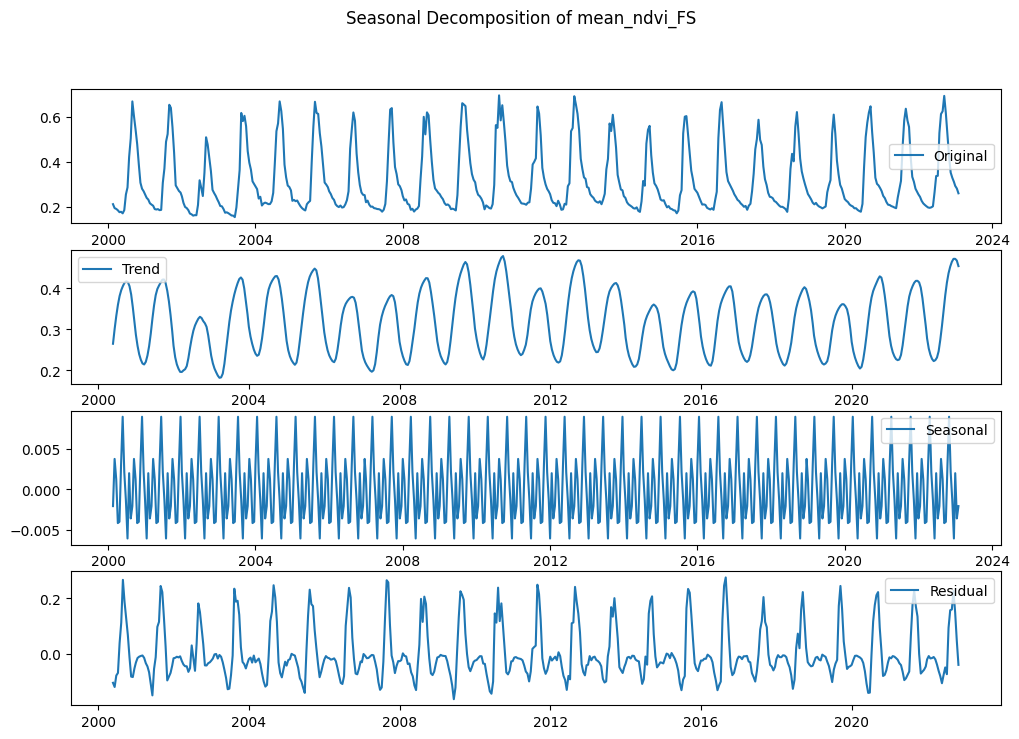

In [15]:
# Seasonal decomposition - Trend analysis

from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decompose(data, column, period=12):
    ts = data.set_index('date')[column].dropna()
    result = seasonal_decompose(ts, model='additive', period=period)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.legend()
    
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend()
    
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend()
    
    plt.subplot(414)
    plt.plot(result.resid, label='Residual')
    plt.legend()
    
    plt.suptitle(f'Seasonal Decomposition of {column}')
    plt.show()

for col in ndvi_columns:
    plot_seasonal_decompose(data, col)

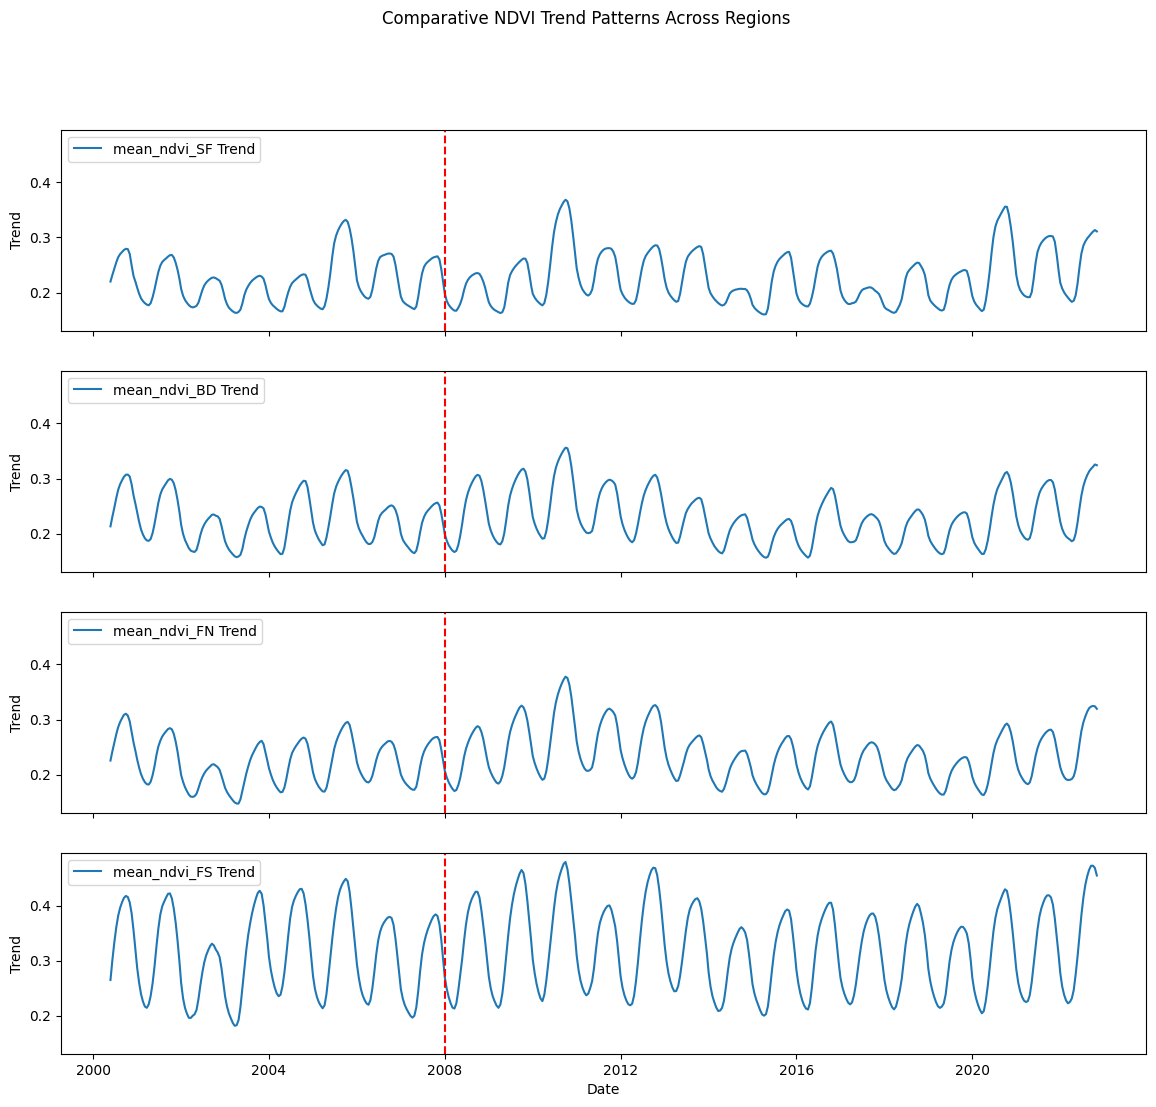

In [16]:
def plot_comparative_trends(data, columns, period=12):
    fig, axes = plt.subplots(len(columns), 1, figsize=(14, 12), sharex=True, sharey=True)
    
    for i, col in enumerate(columns):
        ts = data.set_index('date')[col].dropna()
        result = seasonal_decompose(ts, model='additive', period=period)
        axes[i].plot(result.trend, label=f'{col} Trend')
        axes[i].legend(loc='upper left')
        axes[i].set_ylabel('Trend')
        axes[i].axvline(x=pd.to_datetime('2008-01-01'), color='red', linestyle='--', label='GGWI intervention')
    
    plt.suptitle('Comparative NDVI Trend Patterns Across Regions')
    plt.xlabel('Date')
    plt.show()

# Plot
plot_comparative_trends(data, ndvi_columns)